# importing the library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

# load the data set

In [2]:
df = pd.read_csv('gender-classifier.csv',encoding='latin1')

In [3]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [4]:
df = pd.concat([df.gender,df.description],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 2 columns):
gender         19953 non-null object
description    16306 non-null object
dtypes: object(2)
memory usage: 313.4+ KB


In [6]:
#let's drop NaN values
df.dropna(axis=0,inplace=True)

In [7]:
df.head()

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
2,male,louis whining and squealing and all
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [8]:
df.gender = [1 if each == "female" else 0 for each in df.gender]
df.head(10)

,gender,description
0,0,i sing my own rhythm.
1,0,I'm the author of novels filled with family dr...
2,0,louis whining and squealing and all
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
5,1,you don't know me.
6,0,"A global marketplace for images, videos and mu..."
7,0,The secret of getting ahead is getting started.
8,1,Pll Fan // Crazy about MCD // Ramen is bae
9,1,"Renaissance art historian, University of Notti..."


In [9]:
df.description[4]

'Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx'

# regular Expration

In [10]:
import re
first_description = df.description[4]
description = re.sub("[^a-zA-Z]"," ",first_description)
description = description.lower()
description

'ricky wilson the best frontman kaiser chiefs the best band xxxx thank you kaiser chiefs for an incredible year of gigs and memories to cherish always    xxxxxxx'

In [11]:
import nltk
from nltk.corpus import stopwords
description = nltk.word_tokenize(description)
description = [word for word in description if not word in set(stopwords.words("english"))]
description

['ricky',
 'wilson',
 'best',
 'frontman',
 'kaiser',
 'chiefs',
 'best',
 'band',
 'xxxx',
 'thank',
 'kaiser',
 'chiefs',
 'incredible',
 'year',
 'gigs',
 'memories',
 'cherish',
 'always',
 'xxxxxxx']

# Lemmatazation

In [12]:
import nltk as nlp

lemma = nlp.WordNetLemmatizer()
description = [lemma.lemmatize(word) for word in description]
description

['ricky',
 'wilson',
 'best',
 'frontman',
 'kaiser',
 'chief',
 'best',
 'band',
 'xxxx',
 'thank',
 'kaiser',
 'chief',
 'incredible',
 'year',
 'gig',
 'memory',
 'cherish',
 'always',
 'xxxxxxx']

In [13]:
description = " ".join(description)
description

'ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx'

# Apply to All Description

In [14]:
description_list = []
for description in df.description:
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()
    description = nltk.word_tokenize(description)
    lemma = nlp.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
max_features = 1000
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(description_list).toarray() 

print("{} most common words: {}".format(max_features,count_vectorizer.get_feature_names()))

1000 most common words: ['account', 'action', 'activist', 'actor', 'actress', 'addict', 'addicted', 'adult', 'adventure', 'advertising', 'advice', 'advisor', 'advocate', 'affair', 'affiliate', 'aficionado', 'african', 'age', 'agency', 'ain', 'air', 'aka', 'alive', 'alternative', 'alum', 'alumnus', 'amateur', 'amazing', 'ambassador', 'america', 'american', 'analysis', 'analyst', 'android', 'angel', 'animal', 'anime', 'answer', 'anti', 'app', 'apple', 'area', 'arsenal', 'art', 'artist', 'ask', 'aspiring', 'assistant', 'association', 'atheist', 'athlete', 'athletics', 'au', 'author', 'available', 'average', 'avid', 'award', 'away', 'awesome', 'baby', 'bad', 'bae', 'ball', 'band', 'baseball', 'based', 'basketball', 'beach', 'bear', 'beat', 'beautiful', 'beauty', 'beer', 'believe', 'believer', 'best', 'better', 'bi', 'bieber', 'big', 'biggest', 'bio', 'bit', 'bitch', 'black', 'blacklivesmatter', 'blessed', 'blind', 'blog', 'blogger', 'blue', 'board', 'body', 'book', 'booking', 'born', 'bot'

In [16]:
# split the data into train test split
y = df.iloc[:,0].values
x = sparce_matrix
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)

In [17]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Creating and Training the Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

clasifier = RandomForestClassifier(n_estimators = 100)

clasifier.fit(x_train,y_train)

print("accuracy: ",rf.score(x_test,y_test))

accuracy:  0.6592729513247073


# Predict the newresult

In [21]:
y_pred = clasifier.predict(x_test)

# making confusion matrix

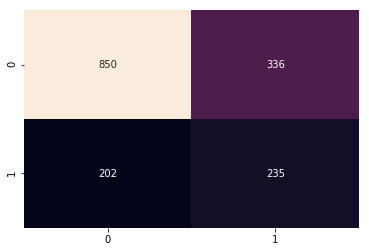

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True,fmt=".0f",cbar=False)